## Keypoints:

* a collection of useful snippet of codes that you can use in other tasks
* examples of how to increase the performance of a ML working on the DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("data/titanic_train.csv")

In [3]:
# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# a shortcut to get the null values withouthaving us to do any plot
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction [we will see how to use name in future]
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)

In [6]:
# Embarked
titanic_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

* the S (southampton) is the most frequent departure harbor so .. we use it to fill the Null value

In [7]:
# in titanic_df, fill the two missing values with the most occurred value, which is "S".
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

In [8]:
titanic_df["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

* now we can perform the conversion of categorical data into 0 and 1 using the get_dummies method

In [9]:
embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'], drop_first=True)

In [10]:
embark_dummies_titanic.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


* in the previous notebook we use concat . this is a similar method using join

In [11]:
titanic_df = titanic_df.join(embark_dummies_titanic)

In [12]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Q,S
0,0,3,male,22.0,1,0,7.2500,NaN,S,0,1
1,1,1,female,38.0,1,0,71.2833,C85,C,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,S,0,1
3,1,1,female,35.0,1,0,53.1000,C123,S,0,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0,1


* now that we have that information we can delete the previous one "Embarked"

In [13]:
titanic_df.drop(['Embarked'], axis=1, inplace=True)

In [14]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction in this simple model
titanic_df.drop("Cabin",axis=1,inplace=True)

In [15]:
# Age 
# get average, std, and number of NaN values in titanic_df
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()


# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)

In [16]:
rand_1.shape

(177,)

In [17]:
# drop all null values, and convert to int
#titanic_df['Age'].dropna().astype(int)

# fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1

# convert from float to int since we are dealing with ages..
titanic_df['Age'] = titanic_df['Age'].astype(int)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [18]:
titanic_df["Age"].shape

(891,)

* now we can work on age and see if we can do something

In [19]:
survived = titanic_df[ titanic_df["Survived"] == 1 ]

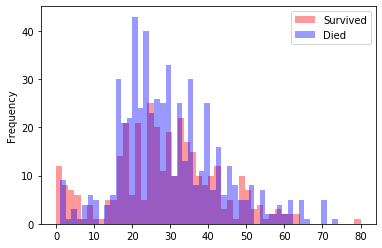

In [20]:

died = titanic_df[titanic_df["Survived"] == 0]

survived["Age"].plot.hist(alpha=0.4,color='red',bins=50)
died["Age"].plot.hist(alpha=0.4,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

* we are going to create a new column called PERSON

In [21]:
# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'  
    else:
        return sex
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)

In [22]:
titanic_df['Person'].head(10)

0      male
1    female
2    female
3    female
4      male
5     child
6      male
7     child
8    female
9     child
Name: Person, dtype: object

* and now the dummies variable for the person categorical data

In [23]:
# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(titanic_df['Person'], drop_first=True)

titanic_df = titanic_df.join(person_dummies_titanic)

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,Person,female,male
0,0,3,male,22,1,0,7.2500,0,1,male,0,1
1,1,1,female,38,1,0,71.2833,0,0,female,1,0
2,1,3,female,26,0,0,7.9250,0,1,female,1,0
3,1,1,female,35,1,0,53.1000,0,1,female,1,0
4,0,3,male,35,0,0,8.0500,0,1,male,0,1


In [24]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,Person,female,male
0,0,3,male,22,1,0,7.2500,0,1,male,0,1
1,1,1,female,38,1,0,71.2833,0,0,female,1,0
2,1,3,female,26,0,0,7.9250,0,1,female,1,0
3,1,1,female,35,1,0,53.1000,0,1,female,1,0
4,0,3,male,35,0,0,8.0500,0,1,male,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,0,1,male,0,1
887,1,1,female,19,0,0,30.0000,0,1,female,1,0
888,0,3,female,39,1,2,23.4500,0,1,female,1,0
889,1,1,male,26,0,0,30.0000,0,0,male,0,1


In [25]:
# No need to use Sex column since we created Person column
titanic_df.drop(['Sex'],axis=1,inplace=True)
titanic_df.drop(['Person'],axis=1,inplace=True)
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Q,S,female,male
0,0,3,22,1,0,7.2500,0,1,0,1
1,1,1,38,1,0,71.2833,0,0,1,0
2,1,3,26,0,0,7.9250,0,1,1,0
3,1,1,35,1,0,53.1000,0,1,1,0
4,0,3,35,0,0,8.0500,0,1,0,1


In [26]:
# define training and testing sets
X = titanic_df.drop("Survived",axis=1)
y = titanic_df["Survived"]

## Train Test Split

Let's split up the data into a training set and a test set!

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Let's build the model in scikit learn

In [28]:
# import the model
from sklearn.tree import DecisionTreeClassifier

In [29]:
# create the model
dtree = DecisionTreeClassifier()

In [30]:
# fit the data to the model
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 


* a prediction on a new data point is made by checking wich region of the partition of the feature space the point lies in and then predicting the majority target (or the single target of pure leaves)
* it also possible to use decision tree for regression tasks. we still find the region where the new data point lies in but this time we calculate the mean target value of the training points in this leaf.

* store the prediction in a variable called predictions

In [31]:
predictions = dtree.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

print (classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       160
           1       0.67      0.70      0.69       108

    accuracy                           0.74       268
   macro avg       0.73      0.74      0.73       268
weighted avg       0.74      0.74      0.74       268



In [33]:
print (confusion_matrix(y_test,predictions))

# basically accuracy is the diagonal values divided by all the items
# precision is on value of prediction divided by the sum of the column
# recall is a value of the row divided by the sum of the row

[[123  37]
 [ 32  76]]


## Controlling complexity


* let's see how much it has learned from the training 

In [34]:
dtree.score(X_train, y_train)

0.9871589085072231

In [35]:
dtree.score(X_test, y_test) # 21/25 accuracy (not recall)

0.7425373134328358

* we see that the accuracy is very high in training : we let it run until it finds the max pure leafs.

* we can restrict the depth of the decision tree. In scikit learn we can appy 'pre-pruning' that will stop developing the tree before it perfectly fit to the training data.
* we want to do so to avoid overfitting and create a model that is more robust to genaralization


### create a second model

* technique called Pruning

In [36]:
dtree2 = DecisionTreeClassifier(max_depth= 2)
dtree2.fit(X_train, y_train)

dtree2.score(X_train,y_train)

0.8009630818619583

In [37]:
dtree2.score(X_test,y_test)

0.7910447761194029

In [38]:
predictionsDtree = dtree2.predict(X_test)
print (classification_report(y_test,predictionsDtree))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       160
           1       0.93      0.52      0.67       108

    accuracy                           0.79       268
   macro avg       0.84      0.75      0.76       268
weighted avg       0.82      0.79      0.77       268



# How the algorithm decides the splits

* if don't set a max_features the training alorithm compares all features on all sample at each nodes.
* it can be computational intense
* it uses GINI impurity formula by default and can use Entropy (not big differences: Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees)

### feature importance

* feature importance rates how important each feature is for the decision a tree makes
* it is a number from 0 to 1. where 0 means not used at all (they all sum to 1)

In [39]:
dtree.feature_importances_


array([0.1536585 , 0.21999345, 0.0285096 , 0.02336533, 0.26535   ,
       0.0018787 , 0.01783253, 0.00640769, 0.2830042 ])

In [40]:
import sklearn.tree as tree

In [41]:
titanic_df.columns[1:]

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S', 'female', 'male'], dtype='object')

([<matplotlib.axis.YTick at 0x7fab867ad748>,
 <a list of 9 Text yticklabel objects>)

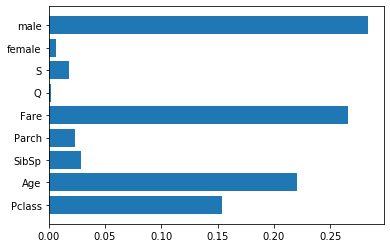

In [42]:
n_features = X.shape[1]
plt.barh(range(n_features),dtree.feature_importances_)
plt.yticks(np.arange(n_features),titanic_df.columns[1:])

In [43]:
# tree.plot_tree(dtree) # This is slow!

([<matplotlib.axis.YTick at 0x7fab85e245c0>,
 <a list of 9 Text yticklabel objects>)

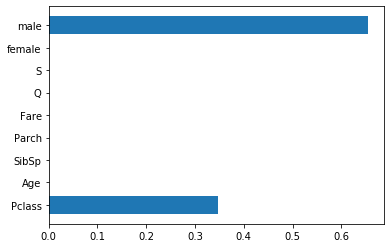

In [44]:
# plot the other model

n_features = X.shape[1]
plt.barh(range(n_features),dtree2.feature_importances_)
plt.yticks(np.arange(n_features),titanic_df.columns[1:])

[Text(167.4, 181.2, 'X[8] <= 0.5\ngini = 0.469\nsamples = 623\nvalue = [389, 234]'),
 Text(83.7, 108.72, 'X[0] <= 2.5\ngini = 0.425\nsamples = 242\nvalue = [74, 168]'),
 Text(41.85, 36.23999999999998, 'gini = 0.107\nsamples = 124\nvalue = [7, 117]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.491\nsamples = 118\nvalue = [67, 51]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 1.5\ngini = 0.286\nsamples = 381\nvalue = [315, 66]'),
 Text(209.25, 36.23999999999998, 'gini = 0.481\nsamples = 82\nvalue = [49, 33]'),
 Text(292.95, 36.23999999999998, 'gini = 0.196\nsamples = 299\nvalue = [266, 33]')]

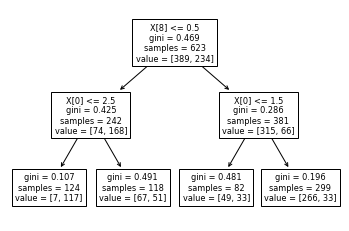

In [45]:

tree.plot_tree(dtree2)

#### feature scaling

* the algorithm is invariant to scaling of the data.
* as each feature is processed separately, and the possible splits of the data don't depend on scaling, no preprocessing like normalisation or standardisation of features is needed for decision tree algorithms, so decision tree work well when you have features that are on completely different scales, or a mix of binary and continuos values. (PS. you might to scale the data for visualisation purpose only)

## Random Forests

* Random Forest is one of the most common ensemble methods, which consists of a collection of Decision Trees. 
* We repeatedly select data from the data set (with replacement) and build a Decision Tree with each new sample.
* It is important to note that since we are sampling with replacement, many data points will be repeated and many won’t be included as well. 
* Random Forest is that each node of the Decision Tree is limited to only considering splits on random subsets of the features.

##### how it works

* In the case of classification with Random Forests, we use each tree in our forest to get a prediction, then the label with the most votes becomes the predicted class for that data point.

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=2)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

confusion_matrix(y_test,rfc_pred)

array([[142,  18],
       [ 31,  77]])

In [47]:
print (classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       160
           1       0.81      0.71      0.76       108

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.81       268



In [48]:
rfc.feature_importances_

array([0.21865283, 0.03155372, 0.05449159, 0.01147095, 0.07801733,
       0.        , 0.00685205, 0.07908614, 0.51987539])

([<matplotlib.axis.YTick at 0x7fab85e75c88>,
 <a list of 9 Text yticklabel objects>)

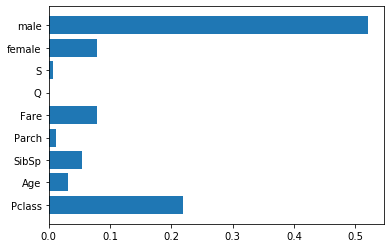

In [49]:
n_features = X.shape[1]
plt.barh(range(n_features),rfc.feature_importances_)
plt.yticks(np.arange(n_features),titanic_df.columns[1:])

# YOUR TURN


* try to change the number of estimators of the Random Forest 